In [421]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

movies = pd.read_csv('Dataset/movies.dat', sep = '::', engine='python',
                     names=['MovieID','Title','Genres'],index_col ='MovieID' )
users = pd.read_csv('Dataset/users.dat', sep = '::', engine='python',
                     names=['UserID','Gender','Age','Occupation','Zip-code'],index_col ='UserID' )
ratings = pd.read_csv('Dataset/ratings.dat', sep = '::', engine='python',
                     names=['UserID','MovieID','Rating','Timestamp'])#,index_col =['UserID','MovieID'] )

In [233]:
#movies[movies['Genres'].str.contains('Action')]
movies.shape , users.shape , ratings.shape
movies.head() , users.head() , ratings.head()

(                                      Title                        Genres
 MovieID                                                                  
 1                          Toy Story (1995)   Animation|Children's|Comedy
 2                            Jumanji (1995)  Adventure|Children's|Fantasy
 3                   Grumpier Old Men (1995)                Comedy|Romance
 4                  Waiting to Exhale (1995)                  Comedy|Drama
 5        Father of the Bride Part II (1995)                        Comedy,
        Gender  Age  Occupation Zip-code
 UserID                                 
 1           F    1          10    48067
 2           M   56          16    70072
 3           M   25          15    55117
 4           M   45           7    02460
 5           M   25          20    55455,
    UserID  MovieID  Rating  Timestamp
 0       1     1193       5  978300760
 1       1      661       3  978302109
 2       1      914       3  978301968
 3       1     3408       4  9

In [234]:
movies.info()
movies.shape
movies.describe()
#Find duplicate rows in movies
movies[movies.duplicated()]
#Determine if ANY Value in a movies is Missing
movies.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
Title     3883 non-null object
Genres    3883 non-null object
dtypes: object(2)
memory usage: 91.0+ KB


False

In [98]:
users.info()
users.shape
users.describe()
#Find duplicate rows in movies
users[users.duplicated(['Gender','Age','Occupation','Zip-code'])].sort_values(by=['Zip-code'])
#Determine if ANY Value in a movies is Missing
#users.isnull().values.any()
#users.groupby('Occupation').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


,UserID,Gender,Age,Occupation,Zip-code
72,73,M,18,4,53706
201,202,M,18,4,53706
300,301,M,18,4,61820
364,365,F,18,4,02138
422,423,M,18,4,55455
425,426,M,18,4,55455
463,464,F,18,4,55455
488,489,M,18,4,55455
495,496,M,18,4,55455
657,658,F,25,0,10021


In [95]:
ratings.head()
# ratings.info()
# ratings.shape
#ratings.describe()
# #Find duplicate rows in movies
#ratings[ratings.duplicated()]
# #Determine if ANY Value in a movies is Missing
#ratings.isnull().values.any()
#ratings[ratings['UserID'] == 5548].shape
#ratings.groupby('Rating').count()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [422]:
users_ratings_df = pd.merge(users,ratings,how='inner',on='UserID')
users_ratings_movies_df = pd.merge(users_ratings_df,movies,how='inner',on='MovieID')
users_ratings_movies_df = users_ratings_movies_df[['UserID','Gender','Age','Occupation','Rating','MovieID','Title','Timestamp']]

# Seperate all genre to movie_genres_df dataframe
movie_genres_df = pd.DataFrame(columns=['MovieID','Genre'])
for index,movie in movies.iterrows():
    for genre in movie['Genres'].split('|'):
        movie_genres_df = movie_genres_df.append({'MovieID' : index , 'Genre': genre},ignore_index=True)

        #show how many movie on each genre      
#movie_genres_df.groupby('Genre').count()

age_group_dict = { 1:  "Under 18",18:  "18-24",25:  "25-34",35:  "35-44",45:  "45-49",50:  "50-55",56:  "56+"}

occupation_dict = {  0:  "other or not specified",1:  "academic/educator",2:  "artist",3:  "clerical/admin",
                   4:  "college/grad student",5:  "customer service",6:  "doctor/health care",7:  "executive/managerial",
                   8:  "farmer",9:  "homemaker",10:  "K-12 student",11:  "lawyer",12:  "programmer",13:  "retired",
                   14:  "sales/marketing",15:  "scientist",16:  "self-employed",17:  "technician/engineer",
                   18:  "tradesman/craftsman",19:  "unemployed",20:  "writer"}

users_ratings_movies_df['Age'] = users_ratings_movies_df['Age'].map(age_group_dict)
users_ratings_movies_df['Occupation'] = users_ratings_movies_df['Occupation'].map(occupation_dict)

#Extract just year from timestamp column
users_ratings_movies_df=users_ratings_movies_df.rename(columns = {'Timestamp':'Year'})
users_ratings_movies_df['Year'] = [datetime.fromtimestamp(timestamp).year for timestamp in users_ratings_movies_df['Year'] ] 


users_ratings_movies_df_separated_genre = pd.merge(users_ratings_movies_df,movie_genres_df,how='inner',on='MovieID')
users_ratings_movies_df = pd.merge(users_ratings_movies_df,movies[['Genres']],how='inner',on='MovieID')

users_ratings_movies_df.head()


,UserID,Gender,Age,Occupation,Rating,MovieID,Title,Year,Genres
0,1,F,Under 18,K-12 student,5,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
1,2,M,56+,self-employed,5,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
2,12,M,25-34,programmer,4,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
3,15,M,25-34,executive/managerial,4,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
4,17,M,50-55,academic/educator,5,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama


In [236]:
# pd.pivot_table(users_ratings_movies_df, values='UserID', index=['Occupation'],
#                     columns=['Rating'], aggfunc='count', fill_value=0)

pd.pivot_table(users_ratings_movies_df_separated_genre, values='UserID', index=['Occupation'],
                    columns=['Genre','Year'], aggfunc='count', fill_value=0)

Genre                  Action                 Adventure                  \
Year                     2000  2001 2002 2003      2000  2001 2002 2003   
Occupation                                                                
K-12 student             5357   456  240   14      3291   288  141    6   
academic/educator       17185  1006  441   41      9500   488  215   12   
artist                  10560   466  251    0      5610   210  166    0   
clerical/admin           6252   605  202   19      3322   280   86   12   
college/grad student    31681  2633  746   92     16085  1354  421   50   
customer service         6240   206   44    3      3109    92   26    1   
doctor/health care       8245   298   56    2      4295   115   35    1   
executive/managerial    26976  1490  369   28     13214   687  212   25   
farmer                    868     0    0    0       528     0    0    0   
homemaker                1888   159   42    9      1192    72   21   14   
lawyer                   4468   204  104   17      2411   100   47    5   
other or not specified  30468  1853  572   64     15662   935  278   44   
programmer              15899   915  228   94      8418   461  124   49   
retired                  2650   115    7    1      1560    52    6    0   
sales/marketing         12442   810  205  102      6003   376  108   51   
scientist                5901   501   73    9      3143   246   57    5   
self-employed           11308   425  124    6      5782   199   51    2   
technician/engineer     21948   901  333  142     11211   527  141   60   
tradesman/craftsman      2986   114   81    7      1713    49   36    3   
unemployed               3233   272  190   11      1680   125   84    7   
writer                  11662   599  234    9      6387   401  175    3   

Genre                  Animation       ... Thriller        War                 \
Year                        2000 2001  ...     2002 2003  2000 2001 2002 2003   
Occupation                             ...                                      
K-12 student                1832  258  ...      283   19  1187  130   67    1   
academic/educator           2926  249  ...      345   23  5526  341  122   17   
artist                      2014   88  ...      274    0  2875  120   77    0   
clerical/admin              1188  106  ...      171   20  1792  107   40   11   
college/grad student        6065  769  ...      663   89  7451  549  184   21   
customer service             933   34  ...       38    2  1285   52    9    2   
doctor/health care          1498   52  ...       45    4  2448  106   18    0   
executive/managerial        3138  237  ...      342   21  7526  324  123    8   
farmer                       134    0  ...        0    0   164    0    0    0   
homemaker                    630   51  ...       63    3   600   45   18    1   
lawyer                       658   45  ...       95    4  1448  100   35    2   
other or not specified      5061  403  ...      425   45  7687  424  160   18   
programmer                  2483  159  ...      202   53  3898  260   55   23   
retired                      313   13  ...        6    0  1282   51    8    0   
sales/marketing             1498  186  ...      167   74  3173  204   73   35   
scientist                    917   86  ...       67    6  1687  114   21    2   
self-employed               1495   80  ...      102    6  3246  149   82    1   
technician/engineer         2974  232  ...      312  123  5047  240   82   38   
tradesman/craftsman          353   16  ...       51    4   774   24    7    1   
unemployed                   501   23  ...      194   10   762   66   41    1   
writer                      2344  211  ...      171   15  3600  178   79    2   

Genre                  Western                 
Year                      2000 2001 2002 2003  
Occupation                                     
K-12 student               255   25   15    5  
academic/educator         1567   96   43    9  
artist        

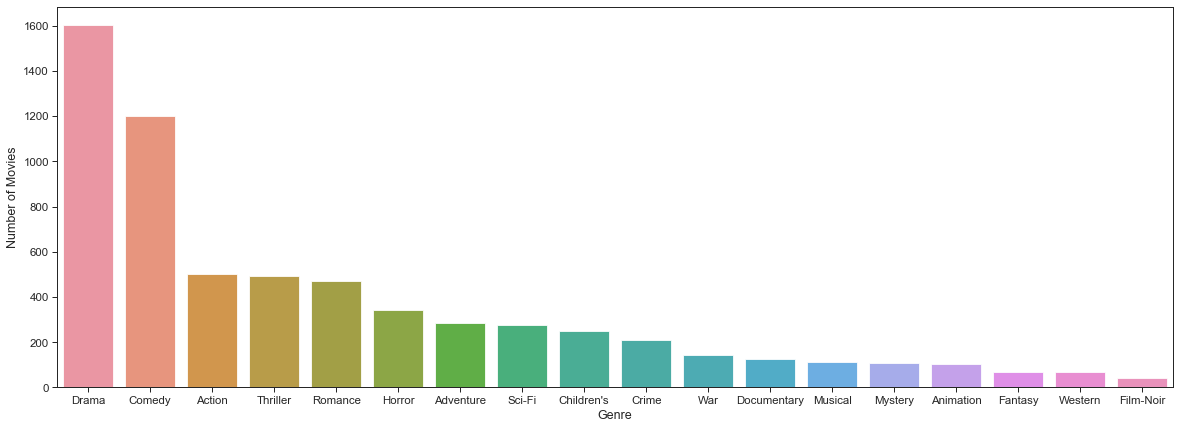

In [237]:
#Let us  have a brief look at number of  movies in each genres 
genre_cnt = movie_genres_df['Genre'].value_counts()
sns.set_context("paper", font_scale=1.3)
plt.figure(figsize=(20,7))
ax = sns.barplot(genre_cnt.index, genre_cnt.values)
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')

plt.show()


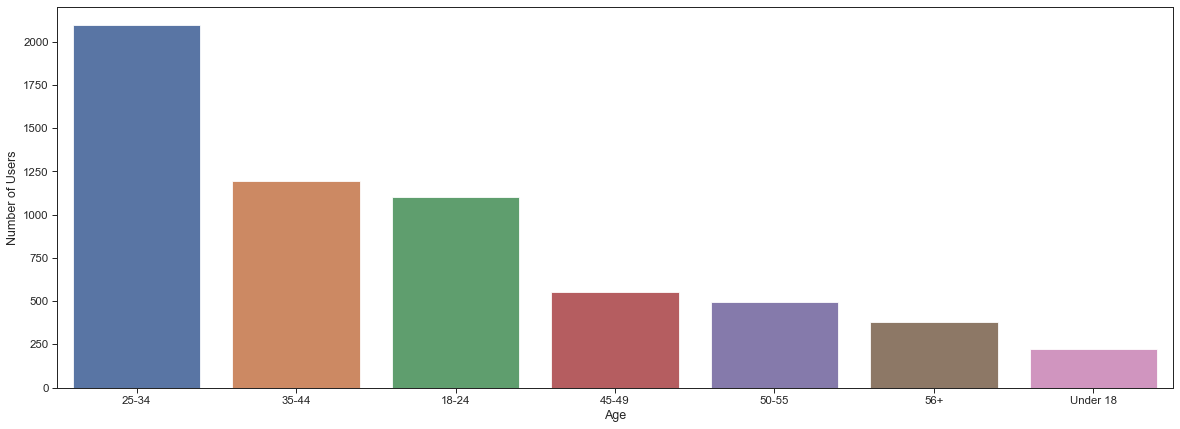

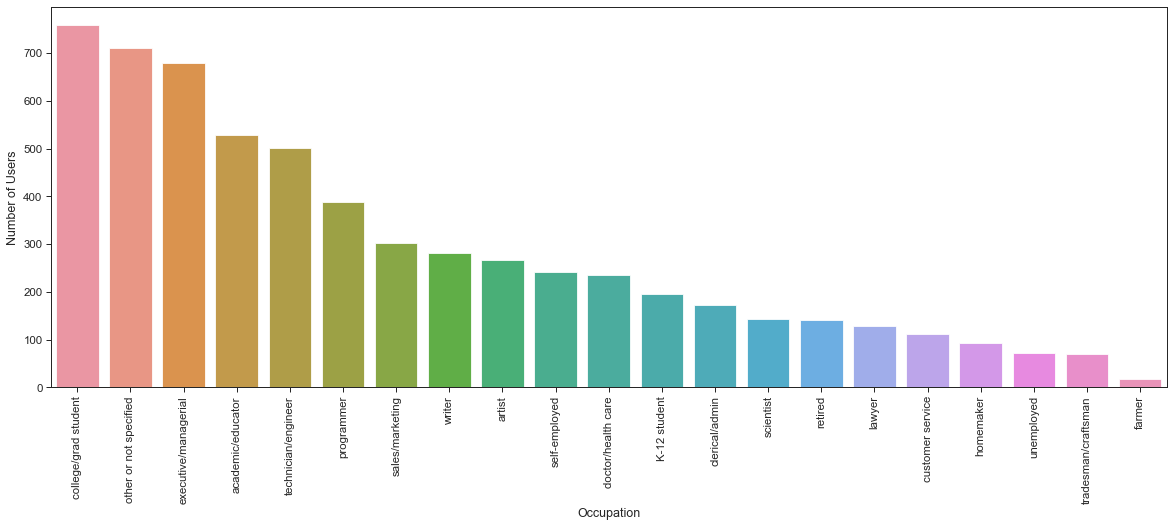

In [238]:
#Let us  have a brief look at number of  user in each occupation
users['Age'] = users['Age'].map(age_group_dict)
user_cnt = users['Age'].value_counts()

plt.figure(figsize=(20,7))
ax = sns.barplot(user_cnt.index, user_cnt.values)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Users')

plt.show()

users['Occupation'] = users['Occupation'].map(occupation_dict)
user_cnt = users['Occupation'].value_counts()

plt.figure(figsize=(20,7))
ax = sns.barplot(user_cnt.index, user_cnt.values)
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Users')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [239]:
popular_pivot = users_ratings_movies_df.pivot_table(index='Title', values='Rating', aggfunc={'mean', 'count'}).reset_index()

popular_pivot.sort_values('mean', ascending=False).head(10),popular_pivot.sort_values('count', ascending=False).head(10),popular_pivot.sort_values(['count','mean'], ascending=False).head(10)

(                                          Title  count  mean
 3477                    Ulysses (Ulisse) (1954)    1.0   5.0
 2025                               Lured (1947)    1.0   5.0
 1203                    Follow the Bitch (1998)    1.0   5.0
 407                    Bittersweet Motel (2000)    1.0   5.0
 3087                     Song of Freedom (1936)    1.0   5.0
 2453                   One Little Indian (1973)    1.0   5.0
 3044                       Smashing Time (1967)    2.0   5.0
 2903  Schlafes Bruder (Brother of Sleep) (1995)    1.0   5.0
 1297         Gate of Heavenly Peace, The (1995)    3.0   5.0
 249                            Baby, The (1973)    1.0   5.0,
                                                   Title   count      mean
 127                              American Beauty (1999)  3428.0  4.317386
 3153          Star Wars: Episode IV - A New Hope (1977)  2991.0  4.453694
 3154  Star Wars: Episode V - The Empire Strikes Back...  2990.0  4.292977
 3155  Star Wars:

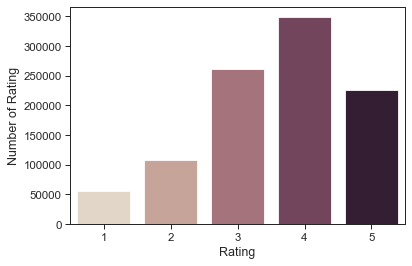

In [240]:
#distribution of ratings
rating_cnt = ratings.groupby('Rating')['Rating']
rating_cnt = rating_cnt.agg({'count'})
rating_cnt.columns = ['Number of Rating']
rating_cnt = rating_cnt.sort_values(['Rating','Number of Rating'],ascending=False).reset_index()
#rating_cnt
#sns.distplot(ratings['Rating'].fillna(ratings['Rating'].median()), kde=False, norm_hist=True, bins=5)
# rating_cnt.plot(kind='scatter', x='Rating', y='Number of Rating',color='purple', edgecolor='')
# plt.ylabel('MovieLens Rating')
# plt.xlabel('Number of Votes')
# plt.show()
# sns.set(style="ticks", color_codes=True)
# sns.catplot(x='Rating', y='Number of Rating', kind="box", data=rating_cnt)

sns.barplot(x="Rating", y="Number of Rating", palette="ch:.25", data=rating_cnt);

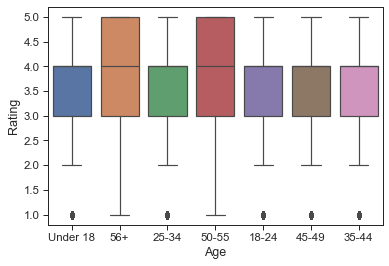

In [303]:
#distributaion of rating between age group
sns.boxplot(x="Age", y="Rating", data=users_ratings_movies_df)
#sns.boxplot(x="Occupation", y="Rating", data=users_ratings_movies_df)

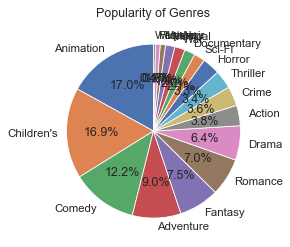

In [241]:
# popularity of each genre based on rating
popular_genre_pivot = users_ratings_movies_df_separated_genre.pivot_table(index='Genre', values='Rating', aggfunc={'mean', 'count'}).reset_index()

popular_genre_pivot = popular_genre_pivot.sort_values(['count','mean'], ascending=False)

genres = movie_genres_df.Genre.unique()

plt.pie(popular_genre_pivot['count'], labels=genres, startangle=90, autopct='%.1f%%')
plt.title('Popularity of Genres')
plt.show()

In [242]:
# finding first 5 most rated (popular) movie in each age group
age_popular_movies_df = users_ratings_movies_df.groupby(['Age','Title'])['Age','Title','Rating']

age_popular_movies_df = age_popular_movies_df.agg({'count','mean'})
age_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_popular_movies_df = age_popular_movies_df.sort_values(['Age','Number of Rating', 'Average of Rating'],ascending=False)
age_popular_movies_df.groupby(level=0).head()

Number of Rating  \
Age      Title                                                                  
Under 18 Toy Story (1995)                                                 112   
         Sixth Sense, The (1999)                                          109   
         Star Wars: Episode IV - A New Hope (1977)                        101   
         Star Wars: Episode VI - Return of the Jedi (1983)                100   
         Men in Black (1997)                                              100   
56+      American Beauty (1999)                                           184   
         Schindler's List (1993)                                          137   
         Shakespeare in Love (1998)                                       136   
         Godfather, The (1972)                                            122   
         Saving Private Ryan (1998)                                       121   
50-55    American Beauty (1999)                                           248   
         Star Wars: Episode IV - A New Hope (1977)                        215   
         Star Wars: Episode V - The Empire Strikes Back ...               206   
         Fargo (1996)                                                     199   
         Godfather, The (1972)                                            198   
45-49    American Beauty (1999)                                           258   
         Star Wars: Episode IV - A New Hope (1977)                        243   
         Star Wars: Episode V - The Empire Strikes Back ...               226   
         Jurassic Park (1993)                                             218   
         Shakespeare in Love (1998)                                       217   
35-44    Star Wars: Episode IV - A New Hope (1977)                        626   
         Star Wars: Episode V - The Empire Strikes Back ...               598   
         American Beauty (1999)                                           597   
         Star Wars: Episode VI - Return of the Jedi (1983)                550   
         Back to the Future (1985)                                        525   
25-34    American Beauty (1999)                                          1334   
         Star Wars: Episode V - The Empire Strikes Back ...              1176   
         Star Wars: Episode VI - Return of the Jedi (1983)               1134   
         Star Wars: Episode IV - A New Hope (1977)                       1128   
         Terminator 2: Judgment Day (1991)                               1087   
18-24    American Beauty (1999)                                           715   
         Star Wars: Episode VI - Return of the Jedi (1983)                586   
         Star Wars: Episode V - The Empire Strikes Back ...               579   
         Matrix, The (1999)                                               567   
         Star Wars: Episode IV - A New Hope (1977)                        562   

                                                             Average of Rating  
Age      Title                                                                  
Under 18 Toy Story (1995)                                             3.919643  
         Sixth Sense, The (1999)                                      4.275229  
         Star Wars: Episode IV - A New Hope (1977)                    4.267327  
         Star Wars: Episode VI - Return of the Jedi (1983)            4.130000  
         Men in Black (1997)                                          3.840000  
56+      American Beauty (1999)                                       4.108696  
         Schindler's List (1993)                                      4.620438  
         Shakespeare in Love (1998)                                   4.117647  
         Godfather, The (1972)                                        4.467213  
         Saving Private Ryan (1998)                                   4.438017  
50-55    American Beauty (1999)                                       4.149194  
         S

In [243]:
# finding first 5 most rated (popular) movie in each occupation group
occupation_popular_movies_df = users_ratings_movies_df.groupby(['Occupation','Title'])['Occupation','Title','Rating']

occupation_popular_movies_df = occupation_popular_movies_df.agg({'count','mean'})
occupation_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
occupation_popular_movies_df = occupation_popular_movies_df.sort_values(['Occupation','Number of Rating', 'Average of Rating'],ascending=False)
occupation_popular_movies_df.groupby(level=0).head()

Number of Rating  \
Occupation           Title                                                                  
writer               American Beauty (1999)                                           181   
                     Star Wars: Episode V - The Empire Strikes Back ...               153   
                     L.A. Confidential (1997)                                         143   
                     Fargo (1996)                                                     142   
                     Being John Malkovich (1999)                                      139   
unemployed           American Beauty (1999)                                            48   
                     Matrix, The (1999)                                                43   
                     Star Wars: Episode IV - A New Hope (1977)                         41   
                     Star Wars: Episode VI - Return of the Jedi (1983)                 40   
                     Fargo (1996)                                                      39   
tradesman/craftsman  American Beauty (1999)                                            38   
                     Star Wars: Episode IV - A New Hope (1977)                         35   
                     Saving Private Ryan (1998)                                        34   
                     Jurassic Park (1993)                                              34   
                     Silence of the Lambs, The (1991)                                  33   
technician/engineer  Star Wars: Episode V - The Empire Strikes Back ...               271   
                     Terminator 2: Judgment Day (1991)                                271   
                     Star Wars: Episode IV - A New Hope (1977)                        270   
                     Star Wars: Episode VI - Return of the Jedi (1983)                259   
                     Matrix, The (1999)                                               258   
self-employed        American Beauty (1999)                                           149   
                     Star Wars: Episode IV - A New Hope (1977)                        115   
                     Star Wars: Episode VI - Return of the Jedi (1983)                115   
                     Star Wars: Episode V - The Empire Strikes Back ...               114   
                     Silence of the Lambs, The (1991)                                 111   
scientist            Star Wars: Episode V - The Empire Strikes Back ...                88   
                     Star Wars: Episode IV - A New Hope (1977)                         85   
                     American Beauty (1999)                                            84   
                     Raiders of the Lost Ark (1981)                                    75   
                     Princess Bride, The (1987)                                        75   
...                                                                                   ...   
customer service     American Beauty (1999)                                            66   
                     Star Wars: Episode IV - A New Hope (1977)                         62   
                     Terminator 2: Judgment Day (1991)                                 60   
                     Star Wars: Episode V - The Empire Strikes Back ...                59   
                     Jurassic Park (1993)                                              59   
college/grad student American Beauty (1999)                                           519   
                     Star Wars: Episode VI - Return of the Jedi (1983)                421   
                     Star Wars: Episode V - The Empire Strikes Back ...               411   
                     Saving Private Ryan (1998)                                       405   
                     Star Wars: Episode IV - A New Hope (1977)                        400   
clerical/admin       American Beauty (1999)                               

In [244]:
# finding first 5 most rated (popular) movie in each occupation&age group
age_occupation_popular_movies_df = users_ratings_movies_df.groupby(['Age','Occupation','Title'])['Age','Occupation','Title','Rating']

age_occupation_popular_movies_df = age_occupation_popular_movies_df.agg({'count','mean'})
age_occupation_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_occupation_popular_movies_df = age_occupation_popular_movies_df.sort_values(['Age','Occupation','Number of Rating', 'Average of Rating'],ascending=False)
age_occupation_popular_movies_df.groupby(level=[0,1]).head()

Number of Rating  \
Age      Occupation             Title                                                                  
Under 18 unemployed             Silence of the Lambs, The (1991)                                   8   
                                Star Wars: Episode VI - Return of the Jedi (1983)                  8   
                                Matrix, The (1999)                                                 8   
                                Star Wars: Episode IV - A New Hope (1977)                          7   
                                Star Wars: Episode V - The Empire Strikes Back ...                 7   
         technician/engineer    Saving Private Ryan (1998)                                         2   
                                There's Something About Mary (1998)                                2   
                                Sixth Sense, The (1999)                                            2   
                                Jurassic Park (1993)                                               2   
                                Man on the Moon (1999)                                             2   
         sales/marketing        Godfather, The (1972)                                              2   
                                Matrix, The (1999)                                                 2   
                                Raiders of the Lost Ark (1981)                                     2   
                                Terminator 2: Judgment Day (1991)                                  2   
                                12 Angry Men (1957)                                                1   
         retired                American Pie (1999)                                                1   
                                Duel in the Sun (1946)                                             1   
                                Midnight Cowboy (1969)                                             1   
                                Midsummer Night's Dream, A (1999)                                  1   
                                Out of Africa (1985)                                               1   
         programmer             American Beauty (1999)                                             1   
                                Baraka (1992)                                                      1   
                                Big Sleep, The (1946)                                              1   
                                Blade Runner (1982)                                                1   
                                Brazil (1985)                                                      1   
         other or not specified Forrest Gump (1994)                                               18   
                                Toy Story (1995)                                                  15   
                                Aladdin (1992)                                                    14   
                                Star Wars: Episode VI - Return of the Jedi (1983)                 13   
                                American Beauty (1999)                                            12   
...                                                                                              ...   
18-24    customer service       American Beauty (1999)                                            12   
                                Star Wars: Episode IV - A New Hope (1977)                         11   
                                Gladiator (2000)                                                  10   
                                Star Wars: Episode VI - Return of the Jedi (1983)                  9   
                                Toy Story (1995)                                                   9   
         college/grad student   American Beauty (1999)                                           363   
                            

In [245]:
# finding first 5 most rated (popular) movie in each age&Sex group
age_Gender_popular_movies_df = users_ratings_movies_df.groupby(['Age','Gender','Title'])['Age','Gender','Title','Rating']

age_Gender_popular_movies_df = age_Gender_popular_movies_df.agg({'count','mean'})
age_Gender_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_Gender_popular_movies_df = age_Gender_popular_movies_df.sort_values(['Age','Gender','Number of Rating', 'Average of Rating'],ascending=False)
age_Gender_popular_movies_df.groupby(level=[0,1]).head()

Number of Rating  \
Age      Gender Title                                                                  
Under 18 M      Matrix, The (1999)                                                82   
                Sixth Sense, The (1999)                                           78   
                Star Wars: Episode IV - A New Hope (1977)                         76   
                Star Wars: Episode VI - Return of the Jedi (1983)                 74   
                Toy Story (1995)                                                  73   
         F      Toy Story (1995)                                                  39   
                Toy Story 2 (1999)                                                36   
                Aladdin (1992)                                                    36   
                Babe (1995)                                                       34   
                Shakespeare in Love (1998)                                        33   
56+      M      American Beauty (1999)                                           130   
                Schindler's List (1993)                                           95   
                Star Wars: Episode V - The Empire Strikes Back ...                94   
                Star Wars: Episode IV - A New Hope (1977)                         93   
                Shakespeare in Love (1998)                                        93   
         F      American Beauty (1999)                                            54   
                Shakespeare in Love (1998)                                        43   
                Schindler's List (1993)                                           42   
                One Flew Over the Cuckoo's Nest (1975)                            39   
                Gone with the Wind (1939)                                         38   
50-55    M      American Beauty (1999)                                           181   
                Star Wars: Episode IV - A New Hope (1977)                        164   
                Star Wars: Episode V - The Empire Strikes Back ...               162   
                Terminator 2: Judgment Day (1991)                                154   
                Jurassic Park (1993)                                             151   
         F      American Beauty (1999)                                            67   
                Shakespeare in Love (1998)                                        59   
                Fargo (1996)                                                      56   
                L.A. Confidential (1997)                                          52   
                Godfather, The (1972)                                             51   
...                                                                              ...   
35-44    M      Star Wars: Episode IV - A New Hope (1977)                        486   
                Star Wars: Episode V - The Empire Strikes Back ...               456   
                American Beauty (1999)                                           435   
                Terminator 2: Judgment Day (1991)                                427   
                Star Wars: Episode VI - Return of the Jedi (1983)                415   
         F      American Beauty (1999)                                           162   
                Shakespeare in Love (1998)                                       157   
                Silence of the Lambs, The (1991)                                 155   
                Star Wars: Episode V - The Empire Strikes Back ...               142   
                Star Wars: Episode IV - A New Hope (1977)                        140   
25-34    M      American Beauty (1999)                                           973   
                Star Wars: Episode V - The Empire Strikes Back ...               929   
                Terminator 2: Judgment Day (1991)                                900   
                Star

In [246]:
# finding first 5 most rated (popular) genre in each Year
genre_year_popular_movies_df = users_ratings_movies_df_separated_genre.groupby(['Year','Genre'])['Rating']

genre_year_popular_movies_df = genre_year_popular_movies_df.agg({'count','mean'})
genre_year_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
genre_year_popular_movies_df = genre_year_popular_movies_df.sort_values(['Year','Number of Rating', 'Average of Rating'],ascending=False)
genre_year_popular_movies_df = genre_year_popular_movies_df.groupby(level=0).head()
genre_year_popular_movies_df
# genre_year_popular_movies_df.groupby(['Year','Genre']).size().unstack().plot(kind='bar',stacked=True)

# #plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.legend(loc='lower right')
# plt.show()


Number of Rating  Average of Rating
Year Genre                                        
2003 Comedy                1261           3.406820
     Drama                 1249           3.686149
     Action                 670           3.376119
     Thriller               521           3.431862
     Romance                499           3.573146
2002 Drama                 9192           3.658072
     Comedy                8665           3.367109
     Action                4542           3.305812
     Thriller              4016           3.421813
     Romance               3569           3.507985
2001 Drama                25239           3.709616
     Comedy               25140           3.441925
     Action               14028           3.377958
     Thriller             12237           3.473400
     Romance               9638           3.538701
2000 Comedy              321514           3.532997
     Drama               318849           3.774257
     Action              238217           3.501711
     Thriller            172906           3.581206
     Sci-Fi              146090           3.477521

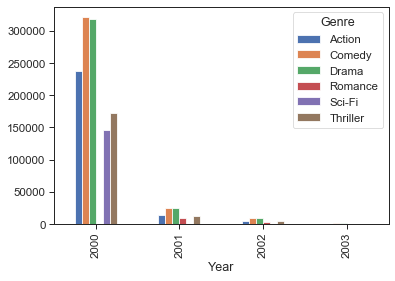

In [247]:
# genre_year_popular_movies_df.groupby(['Year','Genre']).size().unstack().plot(kind='bar',stacked=True)

# #plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.legend(loc='lower right')
# plt.show()

# from matplotlib.ticker import AutoMinorLocator
# fig = plt.figure(figsize=(18,6))
# LOOKBACK_YEARS = 3
# REGISTRATION_YEAR = 2017
# ax1 = sns.violinplot([2000,2001,2002,2003], "Number of Rating", data=genre_year_popular_movies_df, hue='Genre')
# ax1.minorticks_on()
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.grid(which='minor', axis='x', linewidth=1)


#distribution of rating of each year in first 5 popular genre
dist_genre_year_popular_movies_df = genre_year_popular_movies_df.reset_index()
dist_genre_year_popular_movies_df = dist_genre_year_popular_movies_df.pivot_table(index='Year',columns='Genre',values='Number of Rating')
dist_genre_year_popular_movies_df.plot.bar() 

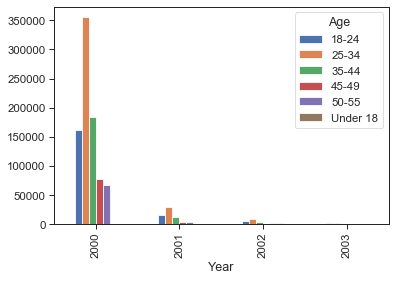

In [248]:
#distribution of rating of each year in most 5 age group

age_year_movies_df = users_ratings_movies_df.groupby(['Year','Age'])['Rating']

age_year_movies_df = age_year_movies_df.agg({'count','mean'})
age_year_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_year_movies_df = age_year_movies_df.sort_values(['Year','Number of Rating', 'Average of Rating'],ascending=False)
age_year_movies_df = age_year_movies_df.groupby(level=0).head()

dist_age_year_movies_df = age_year_movies_df.reset_index()
dist_age_year_movies_df = dist_age_year_movies_df.pivot_table(index='Year',columns='Age',values='Number of Rating')
dist_age_year_movies_df.plot.bar() 

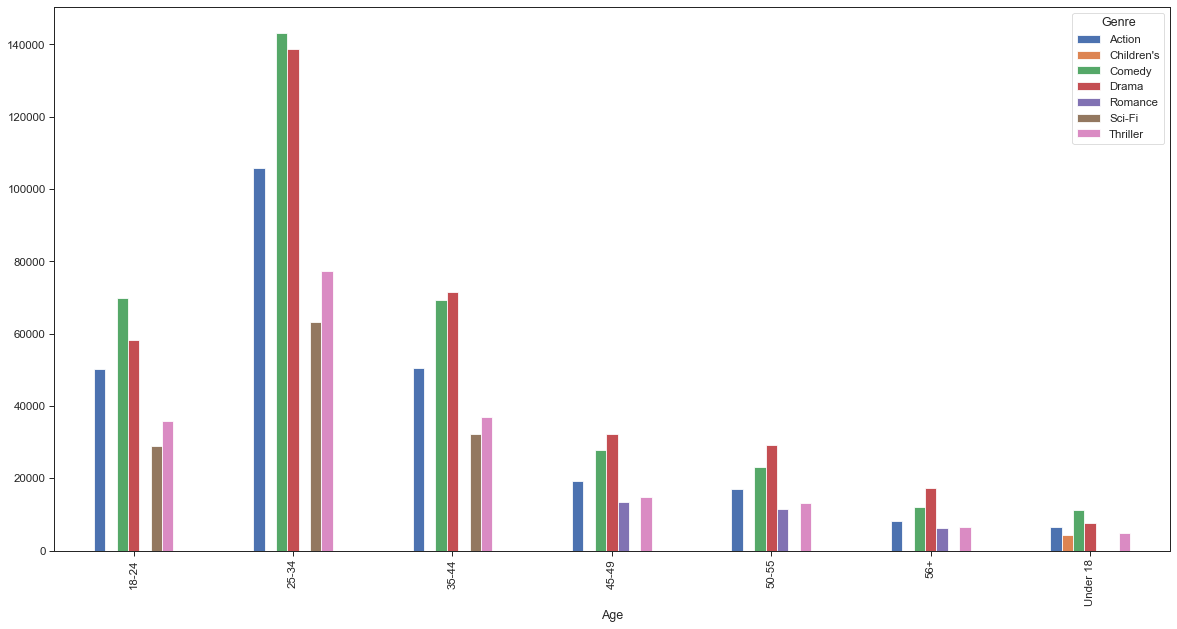

In [249]:
#distribution of rating of each age in most 5 genre group

age_genre_movies_df = users_ratings_movies_df_separated_genre.groupby(['Age','Genre'])['Rating']
age_genre_movies_df = age_genre_movies_df.agg({'count','mean'})
age_genre_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_genre_movies_df = age_genre_movies_df.sort_values(['Age','Number of Rating', 'Average of Rating'],ascending=False)
age_genre_movies_df = age_genre_movies_df.groupby(level=0).head()

dist_age_genre_movies_df = age_genre_movies_df.reset_index()
dist_age_genre_movies_df = dist_age_genre_movies_df.pivot_table(index='Age',columns='Genre',values='Number of Rating')
dist_age_genre_movies_df.plot.bar(figsize=(20,10)) 

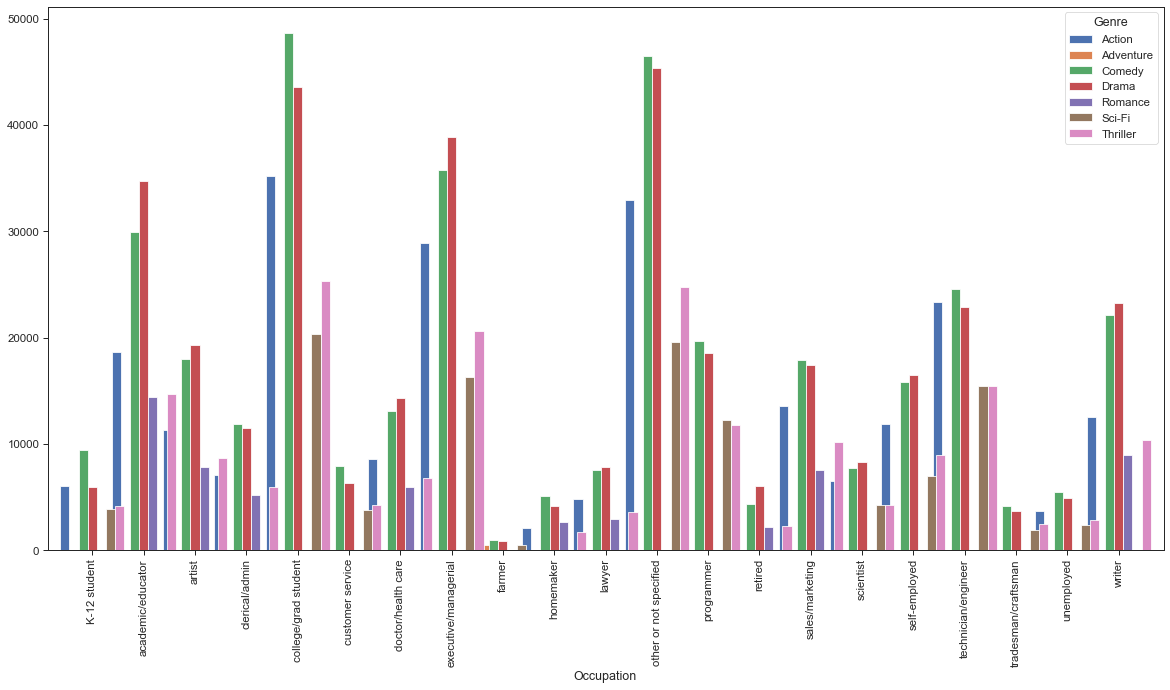

In [250]:
#distribution of rating of each occupation in most 5 genre group
occ_genre_movies_df = users_ratings_movies_df_separated_genre.groupby(['Occupation','Genre'])['Rating']
occ_genre_movies_df = occ_genre_movies_df.agg({'count','mean'})
occ_genre_movies_df.columns = ['Number of Rating', 'Average of Rating']
occ_genre_movies_df = occ_genre_movies_df.sort_values(['Occupation','Number of Rating', 'Average of Rating'],ascending=False)
occ_genre_movies_df = occ_genre_movies_df.groupby(level=0).head()

dist_occ_genre_movies_df = occ_genre_movies_df.reset_index()
dist_occ_genre_movies_df = dist_occ_genre_movies_df.pivot_table(index='Occupation',columns='Genre',values='Number of Rating')
dist_occ_genre_movies_df.plot.bar(figsize=(20,10),width=1.25) 

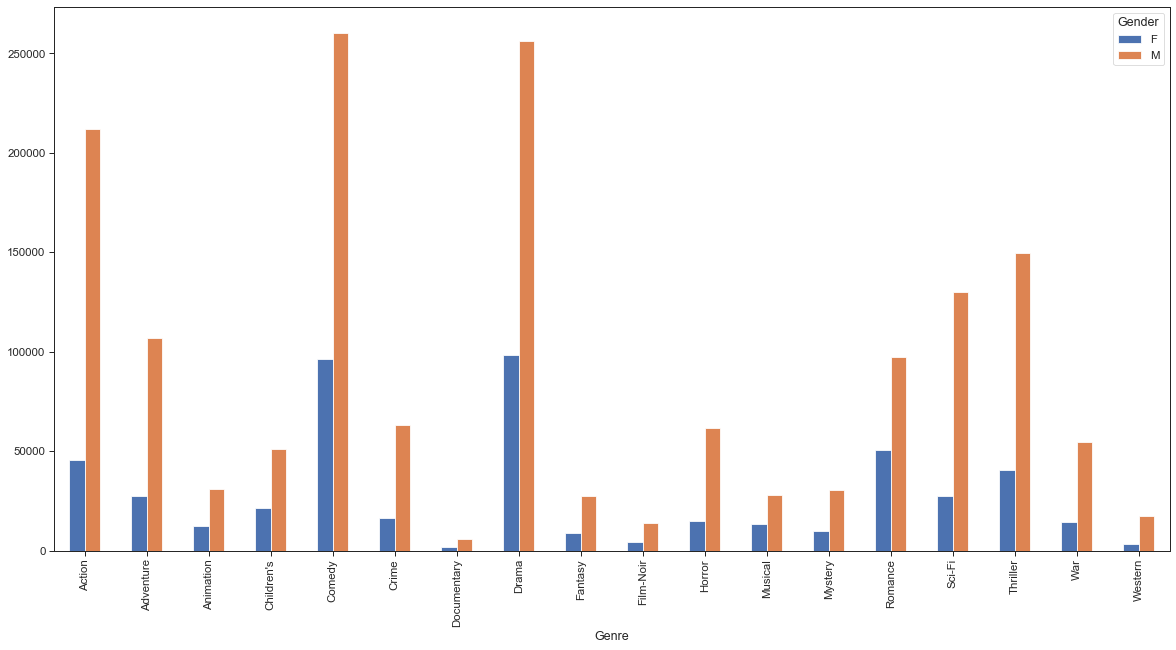

In [251]:
#distribution of rating of each genre in each Gender
gender_genre_movies_df = users_ratings_movies_df_separated_genre.groupby(['Genre','Gender'])['Rating']
gender_genre_movies_df = gender_genre_movies_df.agg({'count','mean'})
gender_genre_movies_df.columns = ['Number of Rating', 'Average of Rating']
gender_genre_movies_df = gender_genre_movies_df.sort_values(['Genre','Number of Rating', 'Average of Rating'],ascending=False)

dist_gender_genre_movies_df = gender_genre_movies_df.reset_index()
dist_gender_genre_movies_df = dist_gender_genre_movies_df.pivot_table(index='Genre',columns='Gender',values='Number of Rating')
dist_gender_genre_movies_df.plot.bar(figsize=(20,10)) 

In [252]:
# finding first 5 most rated (popular) movie in each Genre

Genre_popular_movies_df = users_ratings_movies_df_separated_genre.groupby(['Genre','Title'])['Genre','Title','Rating']

Genre_popular_movies_df = Genre_popular_movies_df.agg({'count','mean'})
Genre_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
Genre_popular_movies_df = Genre_popular_movies_df.sort_values(['Genre','Number of Rating', 'Average of Rating'],ascending=False)
Genre_popular_movies_df.groupby(level=0).head()


Number of Rating  \
Genre      Title                                                                  
Western    Dances with Wolves (1990)                                       1451   
           Butch Cassidy and the Sundance Kid (1969)                       1419   
           Back to the Future Part III (1990)                              1148   
           Blazing Saddles (1974)                                          1119   
           Unforgiven (1992)                                                997   
War        Star Wars: Episode V - The Empire Strikes Back ...              2990   
           Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Saving Private Ryan (1998)                                      2653   
           Braveheart (1995)                                               2443   
           Schindler's List (1993)                                         2304   
Thriller   Terminator 2: Judgment Day (1991)                               2649   
           Matrix, The (1999)                                              2590   
           Silence of the Lambs, The (1991)                                2578   
           Fargo (1996)                                                    2513   
           Sixth Sense, The (1999)                                         2459   
Sci-Fi     Star Wars: Episode IV - A New Hope (1977)                       2991   
           Star Wars: Episode V - The Empire Strikes Back ...              2990   
           Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Jurassic Park (1993)                                            2672   
           Terminator 2: Judgment Day (1991)                               2649   
Romance    Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Shakespeare in Love (1998)                                      2369   
           Princess Bride, The (1987)                                      2318   
           Groundhog Day (1993)                                            2278   
           Forrest Gump (1994)                                             2194   
Mystery    L.A. Confidential (1997)                                        2288   
           2001: A Space Odyssey (1968)                                    1716   
           Mission: Impossible (1996)                                      1527   
           Talented Mr. Ripley, The (1999)                                 1331   
           Chinatown (1974)                                                1185   
...                                                                         ...   
Crime      Fargo (1996)                                                    2513   
           L.A. Confidential (1997)                                        2288   
           Godfather, The (1972)                                           2223   
           Pulp Fiction (1994)                                             2171   
           Usual Suspects, The (1995)                                      1783   
Comedy     American Beauty (1999)                                          3428   
           Back to the Future (1985)                                       2583   
           Men in Black (1997)                                             2538   
           Shakespeare in Love (1998)                                      2369   
           Princess Bride, The (1987)                                      2318   
Children's E.T. the Extra-Terrestrial (1982)                               2269   
           Toy Story (1995)                                                2077   
           Babe (1995)                                                     1751   
           Wizard of Oz, The (1939)                                        1718   
           Bug's Life, A (1998)                                            1703   
Animation  Toy Story (1995)                                                2077

In [253]:
# finding first 5 most rated (popular) movie in each year
year_popular_movies_df = users_ratings_movies_df.groupby(['Year','Title'])['Rating']

year_popular_movies_df = year_popular_movies_df.agg({'count','mean'})
year_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
year_popular_movies_df = year_popular_movies_df.sort_values(['Year','Number of Rating', 'Average of Rating'],ascending=False)
year_popular_movies_df.groupby(level=0).head()

Number of Rating  \
Year Title                                                                  
2003 Back to the Future Part II (1989)                                 14   
     Office Space (1999)                                               12   
     Fight Club (1999)                                                 12   
     Meet the Parents (2000)                                           12   
     Best in Show (2000)                                               11   
2002 Almost Famous (2000)                                              68   
     Best in Show (2000)                                               67   
     Requiem for a Dream (2000)                                        57   
     Wonder Boys (2000)                                                57   
     Jerry Maguire (1996)                                              56   
2001 Almost Famous (2000)                                             266   
     Gladiator (2000)                                                 241   
     Chicken Run (2000)                                               212   
     Meet the Parents (2000)                                          211   
     Wonder Boys (2000)                                               199   
2000 American Beauty (1999)                                          3291   
     Star Wars: Episode V - The Empire Strikes Back ...              2846   
     Star Wars: Episode IV - A New Hope (1977)                       2834   
     Star Wars: Episode VI - Return of the Jedi (1983)               2772   
     Jurassic Park (1993)                                            2559   

                                                         Average of Rating  
Year Title                                                                  
2003 Back to the Future Part II (1989)                            3.357143  
     Office Space (1999)                                          4.166667  
     Fight Club (1999)                                            4.083333  
     Meet the Parents (2000)                                      3.833333  
     Best in Show (2000)                                          3.818182  
2002 Almost Famous (2000)                                         3.897059  
     Best in Show (2000)                                          3.925373  
     Requiem for a Dream (2000)                                   3.982456  
     Wonder Boys (2000)                                           3.807018  
     Jerry Maguire (1996)                                         3.589286  
2001 Almost Famous (2000)                                         4.191729  
     Gladiator (2000)                                             3.825726  
     Chicken Run (2000)                                           3.537736  
     Meet the Parents (2000)                                      3.379147  
     Wonder Boys (2000)                                           4.000000  
2000 American Beauty (1999)                                       4.327864  
     Star Wars: Episode V - The Empire Strikes Back ...           4.295151  
     Star Wars: Episode IV - A New Hope (1977)                    4.451306  
     Star Wars: Episode VI - Return of the Jedi (1983)            4.025253  
     Jurassic Park (1993)                                         3.767097

[Text(0, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
 Text(0, 0, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 Text(0, 0, 'American Beauty (1999)'),
 Text(0, 0, 'Jurassic Park (1993)'),
 Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)')]

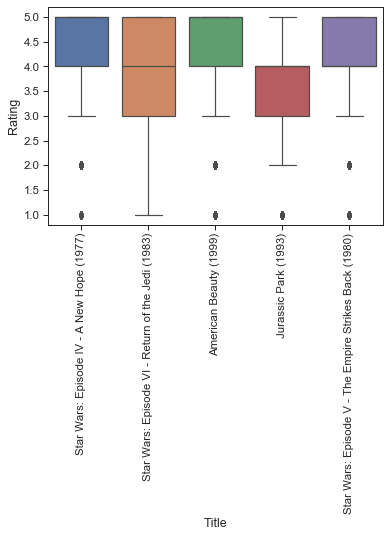

In [316]:
#Top five movies in dataset
top_five_movies = users_ratings_movies_df.groupby(['Title','Genres'])['Genres','Rating']
top_five_movies = top_five_movies.agg({'count','mean'})
top_five_movies.columns = ['Number of Rating', 'Average of Rating']
top_five_movies = top_five_movies.sort_values(['Number of Rating', 'Average of Rating'],ascending=False)
top_five_movies = top_five_movies.head()
top_five_movies
#first_movie = users_ratings_movies_df[users_ratings_movies_df['Title'] == 'Star Wars: Episode V - The Empire Strikes Back (1980)']
#sns.swarmplot(x='')
parent = users_ratings_movies_df.reset_index()
child  = top_five_movies.reset_index()
#parent[parent.Title.isin(child.Title)].Title.unique
s = sns.boxplot(x="Title", y="Rating", data=parent[parent.Title.isin(child.Title)])
#parent[parent.Title.isin(child.Title)].groupby(['Title']).count()
s.set_xticklabels(s.get_xticklabels(),rotation=90)

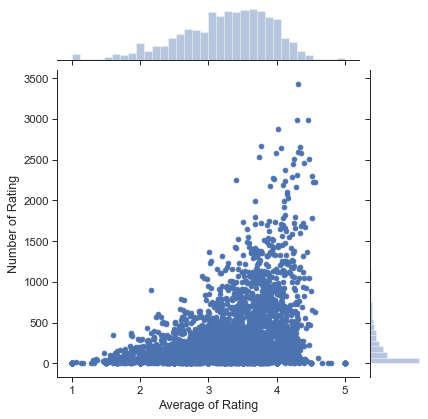

In [328]:
count_mean_rating_df = users_ratings_movies_df.groupby(['Title'])['Title','Rating']
count_mean_rating_df = count_mean_rating_df.agg({'count','mean'})
count_mean_rating_df.columns = ['Number of Rating', 'Average of Rating']
count_mean_rating_df = count_mean_rating_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False)
#count_mean_rating_df
sns.jointplot(x='Average of Rating', y='Number of Rating', data=count_mean_rating_df)

KeyboardInterrupt: 

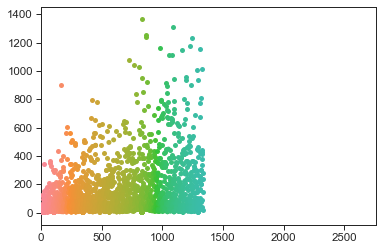

In [329]:
_ = sns.swarmplot(x='Average of Rating',y='Number of Rating',data=count_mean_rating_df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('rating')

# Show the plot
plt.show()

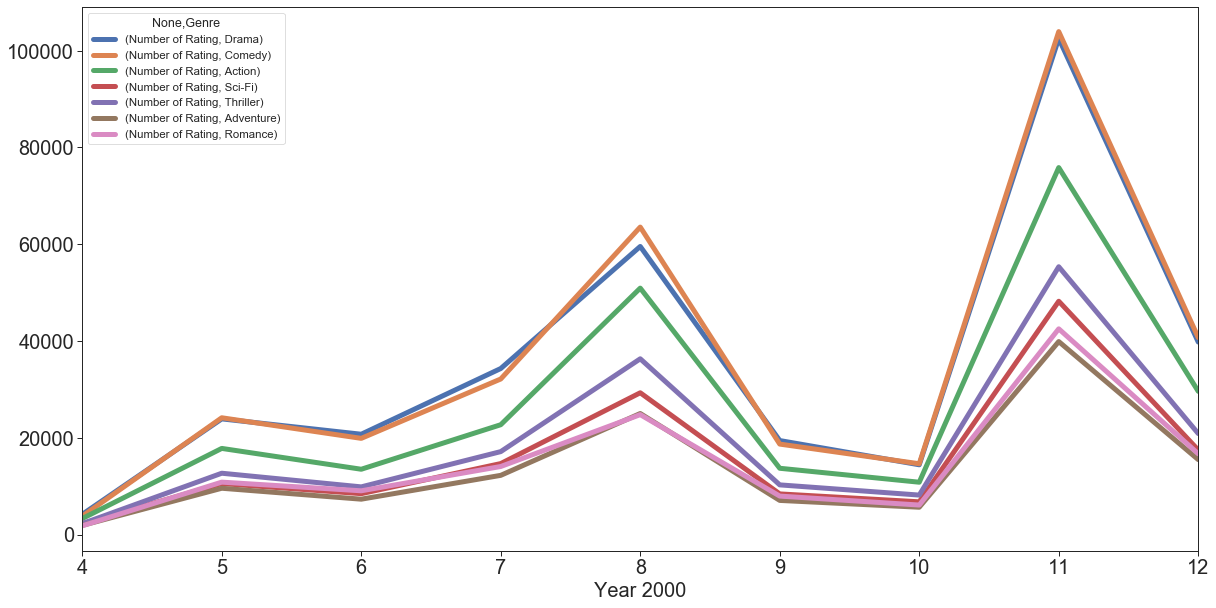

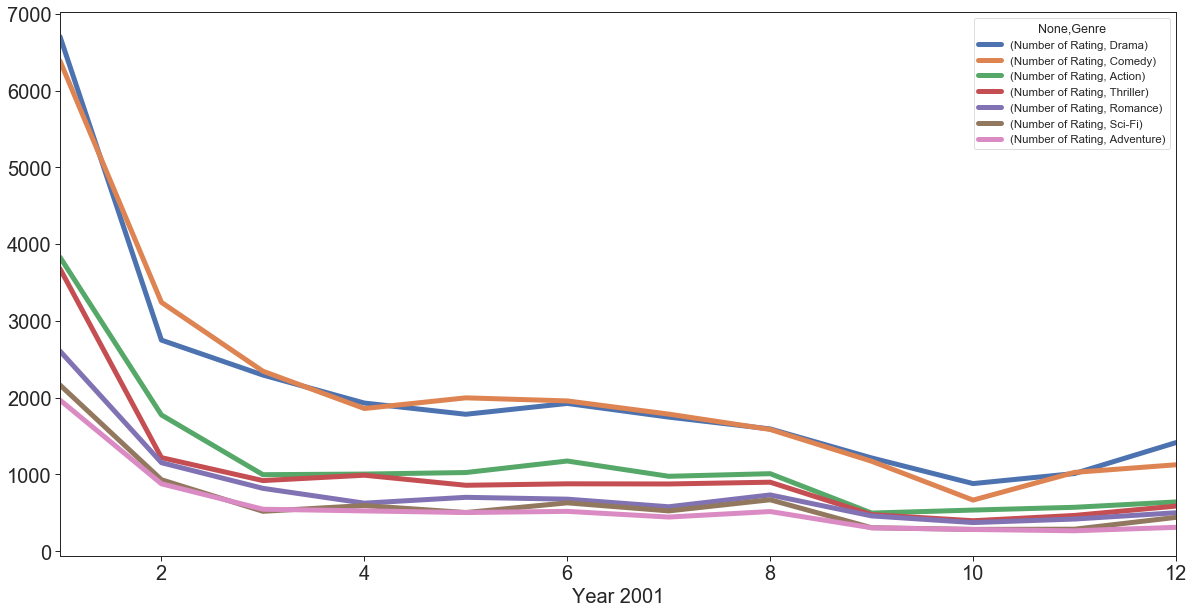

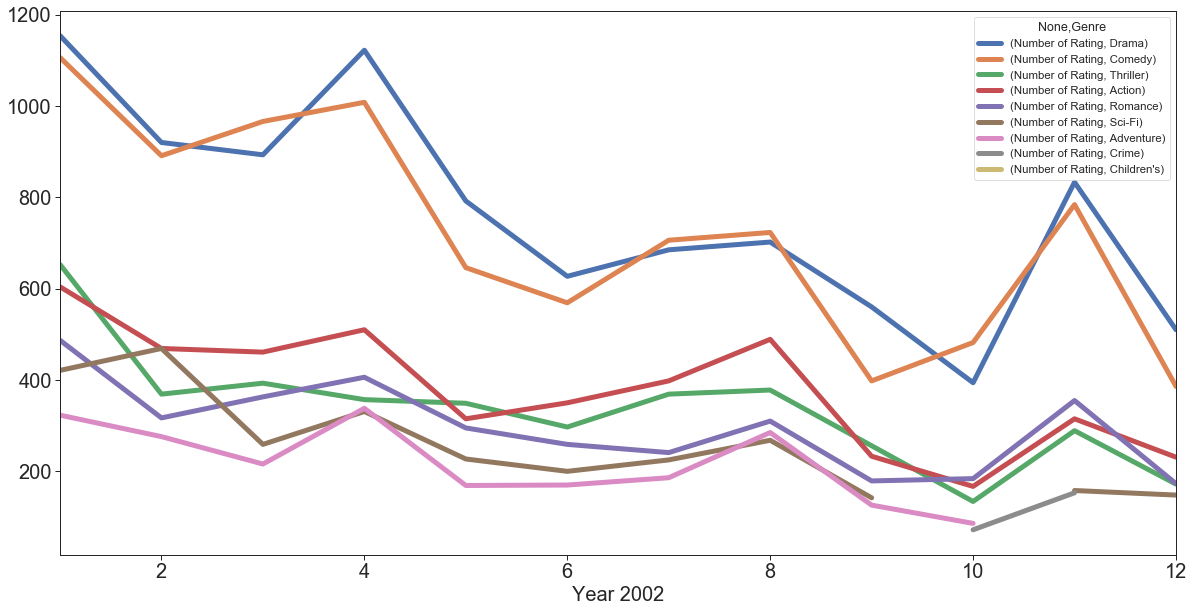

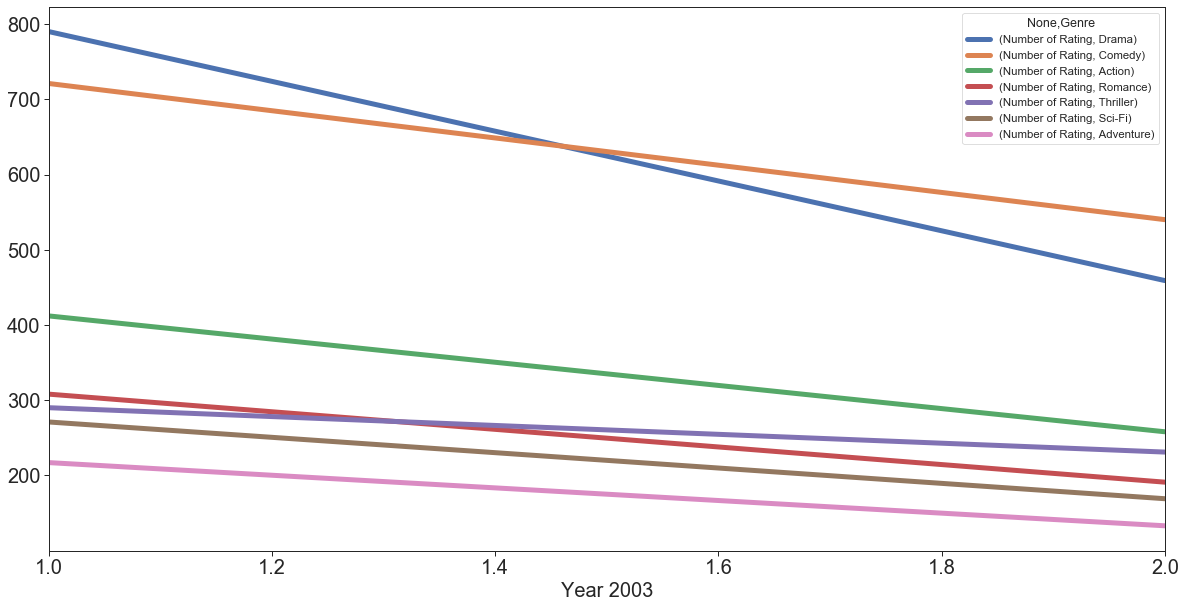

In [515]:
#review five popular genre trends monthly on each year

#monthly_users_ratings_movies_df = pd.DataFrame()
#monthly_users_ratings_movies_df = monthly_users_ratings_movies_df.drop(['Timestamp'],axis=1)
monthly_users_ratings_movies_df = pd.merge(users_ratings_movies_df_separated_genre,ratings[['UserID','MovieID','Timestamp']],how='inner',on=['UserID','MovieID'])

# #Extract Month from timestamp column
monthly_users_ratings_movies_df=monthly_users_ratings_movies_df.rename(columns = {'Timestamp':'Month'})
monthly_users_ratings_movies_df['Month'] = [datetime.fromtimestamp(timestamp).month for timestamp in monthly_users_ratings_movies_df['Month'] ] 




for year in monthly_users_ratings_movies_df['Year'].unique():
    _monthly_users_ratings_movies_df = monthly_users_ratings_movies_df[monthly_users_ratings_movies_df.Year == year]
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.groupby(['Month','Genre'])['Rating']
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.agg({'count'})
    _monthly_users_ratings_movies_df.columns = ['Number of Rating']
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.sort_values(['Month','Number of Rating'],ascending=[True,False])
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.groupby(level=0).head(7)

    months_dict = {  1:  "Jan",2:  "Feb",3:  "Mar",
                        4:  "Apr",5:  "May",6:  "Jun",7:  "Jul",
                        8:  "Aug",9:  "Sep",10:  "Oct",11:  "Nov",12:  "Dec"}

    #monthly_users_ratings_movies_df2000['Month'] = monthly_users_ratings_movies_df2000['Month'].map(months_dict)

    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.unstack()
    #_monthly_users_ratings_movies_df

    _monthly_users_ratings_movies_df.plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Year ' + str(year), fontsize=20);
